<a href="https://colab.research.google.com/github/sanazgit/Skin-Detection/blob/main/SkinDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 How can you find skin and non-skin pixels using Artificial NNs?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pylab import *
import numpy as np
import pandas as pd
from sklearn import preprocessing

# **How the code Works?**

The architecture of the proposed three-layer feed
forward neural network used for skin color
classification.

It is having three
neurons in input layer, five neurons in hidden layer and
two neurons in the output layer. The first neuron in the
output layer represents skin class and the second neuron
represents non-skin class.

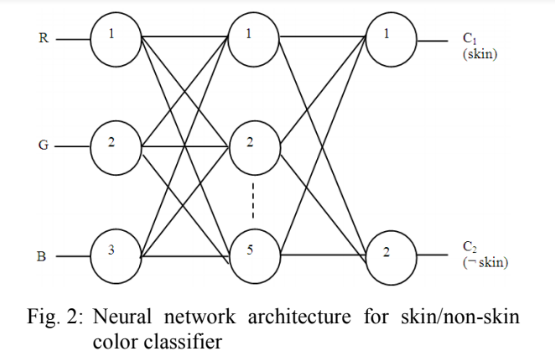

The network is trained using Error Back
Propagation Training Algorithm (EBPTA). This
algorithm minimizes the mean square error between the
desired output and the actual output, using log sigmodal
function for the hidden layer neurons and sigmodal
function for the output layer neurons.
The neural network classifier has two outputs C1
and C2, representing skin and non skin-pixel classes
respectively. The output layer neuron has tan sigmoidal
activation function. Hence C1 and C2 are in the interval.
Separate representative output
neuron for each of these two classes gives better
separability of skin and non-skin pixels. Ideally for skin
pixels C1-C2 = 2 and for non-skin pixels C1-C2 = -2. To
achieve a single step classification, a threshold θ
(0<θ≤2) is introduced that can take care of pixels in the
overlapping region containing skin and non-skin pixels.
More value of C1-C2 means, more confidence in the
pixel as skin pixel.

**Ressources**

[Article_1 link](https://drive.google.com/file/d/127YbKr0-iuRs_ivCKy9FsYXOIqJJ1nhj/view?usp=sharing)

[Article_2 link](https://drive.google.com/file/d/1uBHMG0IjBeyRz1hFhcSgxSWKb2UzEKxA/view?usp=sharing)

[Method of back_propagation link1](https://www.edureka.co/blog/backpropagation/)

[Method of back_propagation link2](https://www.python-course.eu/neural_networks_backpropagation.php)

**Backpropagation – Algorithm**

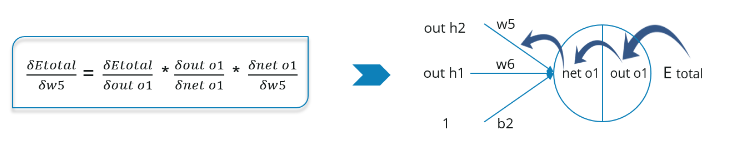



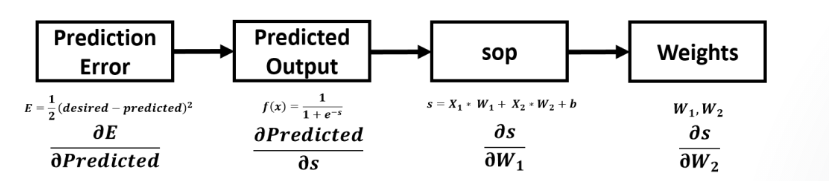

# **Skin Detection Neural Network Class**


*   **Bach learning**



In [ ]:
class SkinNeuralNetwork():

  def __init__(self, inputs):

    hidden_nodes = 5
    output_labels = 2
    feature_set = inputs.shape[1]
    # each input neuro has 5 weights for each hidden neuron
    self.wh = np.random.rand(feature_set,hidden_nodes)
    self.bh = np.random.randn(hidden_nodes)

    self.wo = np.random.rand(hidden_nodes,output_labels)
    self.bo = np.random.randn(output_labels)


  def sigmoid(self,sop):

    if np.all(sop>=0): #Optimize the sigmoid function to avoid extreme data overflow
        return log(1.0/(1+np.exp(-1*sop)))
    else:
        return log(1.0/(1+np.exp(1*sop)))


  def error(self,predicted, target):
    return np.square(predicted-target)/2

  def error_predicted_deriv(self,predicted, target):
    return -(target-predicted)

  def sigmoid_sop_deriv(self,y):
    #return self.sigmoid(sop)*(1.0-self.sigmoid(sop))
    return 1/(1.0+np.exp(y))

  def tanh(self, sop):
     return (np.exp(sop)-np.exp(-sop))/(np.exp(sop)+np.exp(-sop))

  def tanh_deriv(self,z):
    return 1 - z**2

  def update_w(self,w, grad, learning_rate):
    delta= -learning_rate*grad
    return w + learning_rate*grad

  def think(self, inputs):

    predicted_output = []
    theta = 0.5

    for index in range(len(inputs)):

      data_point= inputs[index]

      u = np.dot(data_point, self.wh) + self.bh
      y = self.sigmoid(u)
      v = np.dot(y, self.wo) + self.bo
      z = self.tanh(v)

      # MultiClass Decision Rule:
      if z[0] - z[1] >= theta:
        predicted_class = 1
      else:
        predicted_class = 0

      predicted_output.append(predicted_class)

    return predicted_output

  def train(self, training_set_inputs, y_inputs, lr, epochs):

    sampels = training_set_inputs.shape[0]
    one_hot_labels = np.zeros((sampels, 2))

    for i in range(sampels):
      one_hot_labels[i, y_inputs[i]] = 1

    predicted_output = []
    MSE_list = []
    error_cost= []

    for epoch in range(epochs):

      err_o1_list, err_o2_list= [], []
      dE_wo1_list,dE_bo1_list= [], []
      dE_wo2_list, dE_bo2_list= [], []
      dE_dwh_list, dE_dbh_list= [], []

      for index in range(len(training_set_inputs)):

        target = one_hot_labels[index]
        data_point= training_set_inputs[index]

        # Forward Pass =============
        u = np.dot(data_point, self.wh) + self.bh
        y = self.sigmoid(u)
        v = np.dot(y, self.wo) + self.bo
        z = self.tanh(v)

        err_o1_list.append(self.error(z[0], target[0]))
        err_o2_list.append(self.error(z[1], target[1]))

        # Backward Pass =========
        # Phase 1
        # Calculate the error for every output node independently of each other and update output layer weights.

        # For output1
        dE_do1= self.error_predicted_deriv(target[0],z[0]) # z is predicted class
        do1_dv1= self.tanh_deriv(z[0])
        dv1_dwo= y.reshape(1,-1)

        dE_wo1= dE_do1 * do1_dv1* dv1_dwo
        dE_bo1= dE_do1 * do1_dv1

        dE_wo1_list.append(dE_wo1)
        dE_bo1_list.append(dE_bo1)

        # For output2
        dE_do2= self.error_predicted_deriv(target[1],z[1])
        do2_dv2= self.tanh_deriv(z[1])
        dv2_dwo= y.reshape(1,-1)

        dE_wo2= dE_do2 * do2_dv2* dv2_dwo
        dE_bo2= dE_do2 * do2_dv2

        dE_wo2_list.append(dE_wo2)
        dE_bo2_list.append(dE_bo2)

        # Phase 2
        # Adjust weights from input layer to hidden layer.
        dE_dz= self.error_predicted_deriv(target, z)
        dz_dv= self.tanh_deriv(z)
        dv_dy= self.wo

        dE_dy= np.dot(dE_dz * dz_dv , dv_dy.T) # pb1

        dy_du= self.sigmoid_sop_deriv(y)
        du_dwh= data_point.reshape(-1,1)
        dp= dE_dy * dy_du
        dp= dp.reshape(-1,1)

        dE_dwh= np.dot(du_dwh, dp.T)
        dE_dbh= dE_dy * dy_du

        dE_dwh_list.append(dE_dwh)
        dE_dbh_list.append(dE_dbh)

      dm_wh= np.array(dE_dwh_list).sum()
      dm_bh= np.array(dE_dbh_list).sum()
      dm_wo1= np.array(dE_wo1_list).sum()
      dm_bo1= np.array(dE_bo1_list).sum()
      dm_bwo2= np.array(dE_wo2_list).sum()
      dm_bo2= np.array(dE_bo2_list).sum()

      # ========== Update hidden layer Weights
      self.wh= self.update_w(self.wh, dm_wh, lr)
      self.bh= self.update_w(self.bh, dm_bh, lr)

      # ========== Update output layer Weights
      wo1= self.update_w(self.wo[:,0], dm_wo1, lr)
      bo1= self.update_w(self.bo[0], dm_bo1, lr)
      wo2= self.update_w(self.wo[:,1], dm_bwo2, lr)
      bo2= self.update_w(self.bo[1], dm_bo2, lr)

      self.wo[:,0]=wo1
      self.wo[:,1]=wo2
      self.bo[0]=bo1
      self.bo[1]=bo2
      # ========== Calculate MSE
      err_o1= np.array(err_o1_list).sum()
      err_o2= np.array(err_o2_list).sum()
      err_total = (err_o1 + err_o2) / 4 * len(training_set_inputs)
      MSE_list.append(err_total)

    return MSE_list


  # The neural network prints its weights
  def print_weights(self):

    print("    Layer 1 (5 neurons, each with 3 inputs): ")
    print('wh: ',self.wh)
    print('bh: ',self.bh)
    print("    Layer 2 (2 neuron, with 5 inputs):")
    print('wo: ',self.wo)
    print('bo: ',self.bo)


  def Qualitative_analysis(self, xtest, ytest):

    correct_counts=0  #tatal pixels correctly classidied (skin+non_skin)
    incorrect_counts=0    #total pixels (skin+non_skin)
    actual_class = ytest
    predicted_class = self.think(xtest)

    for index in range(len(xtest)):
      if actual_class[index]  == predicted_class[index]:
        correct_counts+=1
      else:
        incorrect_counts +=1


    print("ACCURACY:")
    print("Model Accuracy:", ( correct_counts * 1.0) / (correct_counts + incorrect_counts * 1.0))


# **Read Data**

In [ ]:
# Read data
data= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANN_Exercises/Skindataset_smallSize.xlsx')
data

,R,G,B,label
0,221,166,145,1
1,219,164,143,1
2,216,164,143,1
3,217,165,144,1
4,220,169,150,1
...,...,...,...,...
9995,182,155,128,0
9996,178,151,124,0
9997,179,152,125,0
9998,185,158,131,0


# **Data Preprocessing**

In [ ]:
# make train / test dat

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data= shuffle(data)

X= data.iloc[:,[0,1,2]].values
y= data.iloc[:,3].values

scaler = preprocessing.StandardScaler().fit(X)
X_scaled= scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, shuffle=True)

# **Making instances of the class**

In [ ]:
lr= 10e-3 # Hint: for high epochs it's better to increase the power e! :)
skin_Ann= SkinNeuralNetwork(X_train)
ytrain= y_train.reshape(-1,1)
error= skin_Ann.train(X_train,ytrain,lr,50)

In [ ]:
print("Stage 2: New synaptic weights after training: ")
skin_Ann.print_weights()

Stage 2: New synaptic weights after training: 
    Layer 1 (5 neurons, each with 3 inputs): 
wh:  [[-12.5298938  -13.24417599 -12.81178009 -13.03184803 -12.82989788]
 [-12.8054058  -13.17592037 -12.41909593 -12.50092257 -12.86282598]
 [-13.29811958 -12.99747268 -12.51171744 -12.95304149 -12.97810187]]
bh:  [34.82570802 35.27545287 36.95166983 37.10388891 35.10386271]
    Layer 2 (2 neuron, with 5 inputs):
wo:  [[-31.86164985 -13.70789776]
 [-31.48565118 -14.50828396]
 [-32.09396919 -14.4587356 ]
 [-31.68840957 -14.5085278 ]
 [-31.12678534 -13.56457604]]
bo:  [18.54978352  5.61154608]


# **Plot MSE**

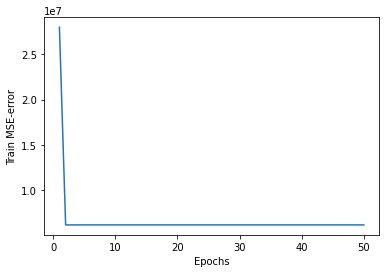

In [ ]:
plt.plot(range(1, len(error) + 1), error)
plt.xlabel('Epochs')
plt.ylabel('Train MSE-error')
plt.show()

**Test the model with test dataset and calculate accuracy**

In [ ]:
skin_Ann.Qualitative_analysis(X_train, ytrain)

ACCURACY:
Model Accuracy: 0.5047142857142857


In [ ]:
skin_Ann.Qualitative_analysis(X_test, y_test)

ACCURACY:
Model Accuracy: 0.48933333333333334
